# TP3 - VANBELLE Julien

# Clustering de documents

## Imports

In [58]:
import collections
import os
import string
import sys
import nltk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [59]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/julienvanbelle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
data_path = "../data/txt/"

## Choisir une décennie

In [61]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [62]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [63]:
# Exemple de fichiers
files[:5]

['Bxl_1960_Tome_II1_Part_1.txt',
 'Bxl_1960_Tome_II1_Part_2.txt',
 'Bxl_1960_Tome_II1_Part_3.txt',
 'Bxl_1960_Tome_II1_Part_4.txt',
 'Bxl_1960_Tome_II1_Part_5.txt']

In [64]:
texts = [open(data_path + f).read() for f in files]

In [65]:
# Exemple de textes
texts[0][:400]

'PUBLICATION\n\nPERIODIQUE\n\nVILLE DE BRUXELLES\n\nAnnée 1960\n\nBULLETIN\nCOMMUNAL\nTOME II "\n_u\n\nImpr. H . 6 M . S C H A U M A N S\nSociété\n\nAnonyme\n\nParvis Saint-Gilles, 41\nBruxelles\n1960\n\n\x0c\x0cN" 14\n\nCOMPTE\n\nR E N D U D E L A S E A N C E D U 1"\' A O U T\n\nVILLE\n\nDE\n\n1960\n\nBRUXELLES\n\nBULLETIN\n\nCOMMUNAL\n\n(Publication\n\npériodique)\n\nA n n é e 1960\n\nCONSEIL\n\nS é a n c e du\n\nPRESIDENCE\n\nCOMMUNAL\n\n1\n\ner\n\naoût\n\nDE M'

## Vectoriser les documents à l'aide de TF-IDF

In [66]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [67]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [68]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 1min 30s, sys: 525 ms, total: 1min 31s
Wall time: 1min 35s


In [69]:
# Détail de la matrice
tfidf_vectors

<420x6466 sparse matrix of type '<class 'numpy.float64'>'
	with 574279 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [70]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

+considérant    0.300647
fer             0.228639
curage          0.207466
dma             0.153796
art             0.147675
                  ...   
engagé          0.000000
engager         0.000000
engagements     0.000000
engage          0.000000
™               0.000000
Length: 6466, dtype: float64

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [71]:
N_CLUSTERS = 3

### Instancier le modèle K-Means et ses arguments

In [72]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [73]:
clusters = km_model.fit_predict(tfidf_vectors)

In [74]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [75]:
pprint(dict(clustering))

{0: ['Bxl_1960_Tome_II1_Part_1.txt',
     'Bxl_1960_Tome_II1_Part_2.txt',
     'Bxl_1960_Tome_II1_Part_3.txt',
     'Bxl_1960_Tome_II1_Part_4.txt',
     'Bxl_1960_Tome_II1_Part_5.txt',
     'Bxl_1960_Tome_II1_Part_6.txt',
     'Bxl_1960_Tome_II1_Part_7.txt',
     'Bxl_1960_Tome_II1_Part_8.txt',
     'Bxl_1960_Tome_II2_Part_1.txt',
     'Bxl_1960_Tome_II2_Part_2.txt',
     'Bxl_1960_Tome_II2_Part_3.txt',
     'Bxl_1960_Tome_II2_Part_4.txt',
     'Bxl_1960_Tome_II2_Part_5.txt',
     'Bxl_1960_Tome_II2_Part_6.txt',
     'Bxl_1960_Tome_I_Part_1.txt',
     'Bxl_1960_Tome_I_Part_10.txt',
     'Bxl_1960_Tome_I_Part_11.txt',
     'Bxl_1960_Tome_I_Part_2.txt',
     'Bxl_1960_Tome_I_Part_3.txt',
     'Bxl_1960_Tome_I_Part_4.txt',
     'Bxl_1960_Tome_I_Part_5.txt',
     'Bxl_1960_Tome_I_Part_6.txt',
     'Bxl_1960_Tome_I_Part_7.txt',
     'Bxl_1960_Tome_I_Part_8.txt',
     'Bxl_1960_Tome_I_Part_9.txt',
     'Bxl_1960_Tome_RptAn_Part_1.txt',
     'Bxl_1960_Tome_RptAn_Part_2.txt',
     'Bxl_1960_To

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [76]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [77]:
reduced_vectors[:10]

array([[-0.38270835, -0.30285992],
       [-0.4602124 , -0.36439747],
       [-0.04160272,  0.07746162],
       [-0.42760824, -0.33990769],
       [-0.23794297, -0.10348074],
       [-0.10847705, -0.04633977],
       [-0.26295843, -0.19855669],
       [-0.30964996, -0.15191742],
       [-0.08372119, -0.0157034 ],
       [-0.09278711,  0.02179108]])

### Générer le plot

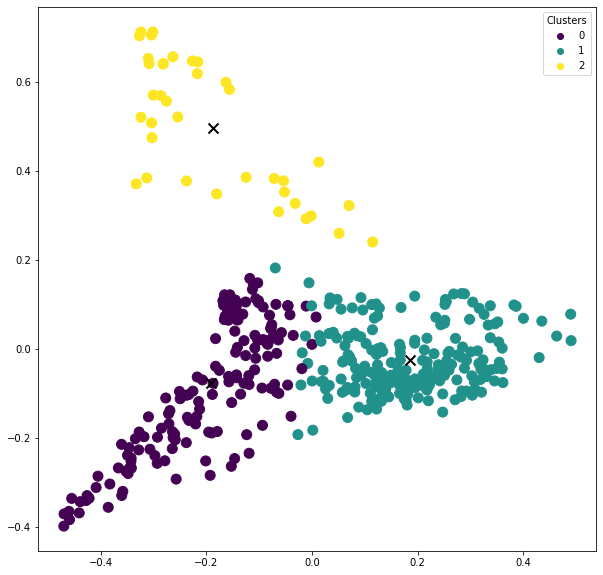

In [78]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Word Embeddings : le modèle Word2Vec

In [79]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [87]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

In [88]:
bigram_phrases = Phrases(sentences)

In [89]:
type(bigram_phrases.vocab)

dict

In [90]:
len(bigram_phrases.vocab.keys())

5978799

In [91]:
key_ = list(bigram_phrases.vocab.keys())[144]
print(key_)

absence_&


In [92]:
bigram_phrases.vocab[key_]

1

In [94]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [96]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [97]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [98]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [99]:
print(corpus[:100])

[['v', 'i', 'l', 'l', 'e', 'de', 'bruxelles', 'bulletin', 'ires', '8eanas', 'dl', '!'], ['conseil_communal', 'annee', '1847', '.'], ['au', 'ville', 'de', 'b', 'r', 'u', 'x', 'e', 'l', 'l', 'e', 's', '.'], ['bulletin', 'conseil', 'aes', 'seances', 'communal', '.'], ['annee', '1847', '.'], ['bruxelles', ',', 'imprimerie', 'd', 'e', 'j', '.'], ['h', '.', 'b', 'r', 'i', 'a', 'r', 'd', ',', 'rite', 'n', 'e', 'u', 'v', 'e', ',', '3', '1', ',', 'faubourg', 'de', 'n', 'a', 'm', 'u', 'r', ',', '1', '84', '8', 'de', '!'], ['du', 'consei', 'dibi', 'e', '.', '-', 'communication', 'conclusions', 'de', 'la', 'section', 'des', 'du', 'nouvel_hospice', 'pour', 'les', 'av', 'enraisonde', 'l', "'", 'absence', '&', 'maladie', '.', 'le', 'conseil', 'ajourne', 'leurs', 'de', 'pierre', 'el', 'marchai', 'cles', 'des', 'taxes', 'communale', "'", 'bieniaance', 'eldeseianv', 'il', 'est', 'donne', 'communie', ';', 'mandant', 'le', 'o', 'p', 'fa', 'gnant', 'l', "'", 'envoi', 'de', 'leur', 'bn', 'par', 'l', "'", 'e

In [100]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: user 15min 43s, sys: 1min 42s, total: 17min 25s
Wall time: 9min 33s


In [101]:
outfile = f"../data/bulletins.model"
model.save(outfile)

In [102]:
model = Word2Vec.load("../data/bulletins.model")

In [103]:
model.wv["bruxelles"]

array([ 2.2944884e+00, -9.1602452e-02, -7.2554249e-01,  1.3521242e-01,
       -6.0066515e-01, -4.4808626e+00,  2.9171643e+00,  4.9117961e+00,
       -1.3686624e+00,  3.3166229e-03,  6.5743607e-01,  6.4540811e+00,
       -2.3503423e+00,  2.6656582e+00,  3.2424855e+00, -2.5914817e+00,
       -6.1931264e-01, -9.0687382e-01,  4.3056226e+00,  8.8524330e-01,
       -3.1817393e+00, -2.9683928e+00, -1.9961153e+00,  2.4275310e+00,
       -5.1753558e-02,  1.7768129e+00,  7.8320217e-01,  1.3756663e+00,
        1.9857808e+00,  4.2234268e+00, -3.1387577e+00, -3.1243166e-01],
      dtype=float32)

In [104]:
model.wv.similarity("boucher", "boulanger")

0.9009375

In [105]:
model.wv.most_similar("bruxelles", topn=10)

[('laeken', 0.817205011844635),
 ('paris', 0.788142204284668),
 ('liege', 0.7653381824493408),
 ('nivelles', 0.7514805197715759),
 ('gand', 0.7191750407218933),
 ('considere_comme_officiel', 0.7118009328842163),
 ('lille', 0.7036864757537842),
 ('differents_quartiers', 0.6917808651924133),
 ('charleroi', 0.6838973760604858),
 ('ostende', 0.6743255257606506)]

In [106]:
print(model.wv.most_similar(positive=['bruxelles', 'france'], negative=['belgique']))

[('ostende', 0.8346115946769714), ('lille', 0.8014910221099854), ('hambourg', 0.7949166893959045), ('huy', 0.791612982749939), ('paris', 0.789742648601532), ('binche', 0.7840374112129211), ('verviers', 0.7795772552490234), ('londres', 0.7702552080154419), ('amsterdam', 0.766064465045929), ('berlin', 0.7654255032539368)]
